In [1]:
#import libraries
library(stats)
library(circular)
library(ggplot2)
library(dplyr)
library(mvtnorm)


Attaching package: 'circular'

The following objects are masked from 'package:stats':

    sd, var


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
#import data from csv (csv needs to be uploaded on "home" page)
datamp = read.csv("alignment_analysis3.csv")


In [3]:
#Check dimensions of imported data and column names
dim(datamp)
names(datamp)

[1] 180   5

[1] "ï..Angle" "X9_nw"    "X0_mw"    "X20_mw"   "test"

In [4]:
## Rename Columnes because they came out weird and don't want to figure out that formatting right now
names(datamp)[names(datamp) == "ï..Angle"] <- "Angle"
names(datamp)[names(datamp) == "X9_nw"] <- "nine"
names(datamp)[names(datamp) == "X0_mw"] <- "zero"
names(datamp)[names(datamp) == "X20_mw"] <- "twenty"
names(datamp)[names(datamp) == "test"] <- "test"

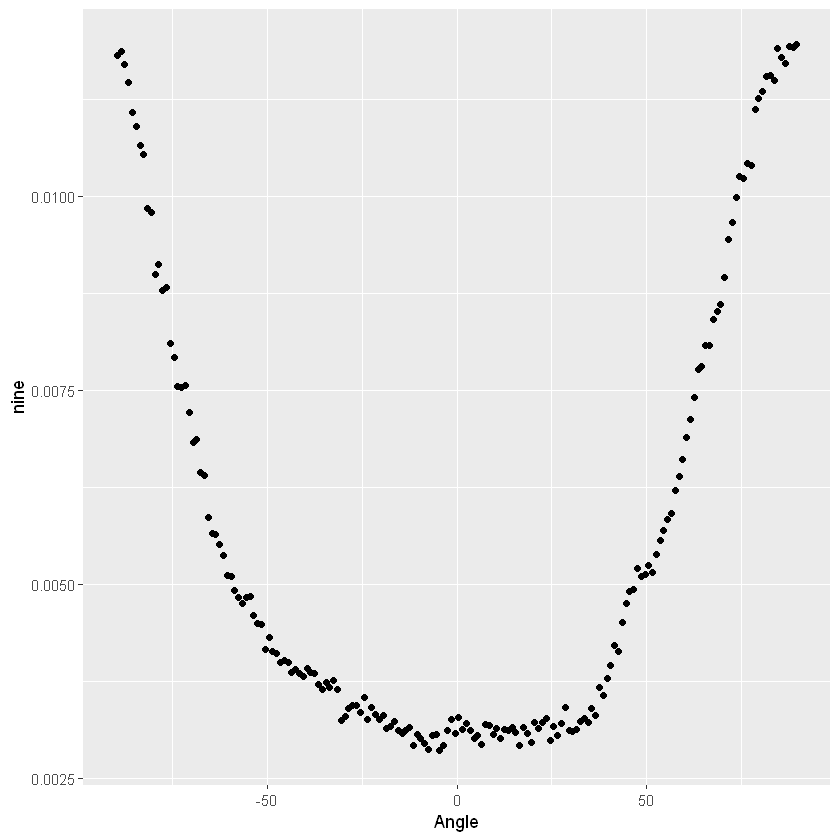

In [5]:
#visualize imported data with plot to make sure it looks ok
ggplot(data= datamp, aes(x = Angle, y = nine)) +
  geom_point()

In [6]:
#Put data into format for making circular and statistical tests
DT <- matrix(c(datamp$Angle,datamp$nine),ncol=2,byrow=FALSE)
AB <- matrix(c(datamp$Angle,datamp$zero),ncol=2,byrow=FALSE)
CD <- matrix(c(datamp$Angle,datamp$twenty),ncol=2,byrow=FALSE)
EF <- matrix(c(datamp$Angle,datamp$test),ncol=2,byrow=FALSE)

In [7]:
#make data circular
Nine_mw <- circular(DT, units="degrees", template="none")
Zero_mw <- circular(AB, units="degrees", template="none")
Twenty_mw  <- circular(CD, units="degrees", template="none") 
TEST <-circular(EF, units="degrees", template="none") 

In [8]:
#watson two test 
#Are two groups' orientations significantly different from each other? 
watson.two.test(Twenty_mw,Zero_mw)
watson.two.test(Nine_mw,Zero_mw)
watson.two.test(Twenty_mw,Nine_mw)

#test data to make sure this is working the way I think it is 
# if p value is < 0.05 should be statistically different/significant, >0.05 not statistically significant/different
watson.two.test(Zero_mw,TEST) #test is a fake set that should definitely be statistically significant 
watson.two.test(Zero_mw,Zero_mw) #testing should not be statistically significant because they are the same 


      Watson's Two-Sample Test of Homogeneity 

Test Statistic: 1.874 
P-value < 0.001 
 


      Watson's Two-Sample Test of Homogeneity 

Test Statistic: 1.3378 
P-value < 0.001 
 


      Watson's Two-Sample Test of Homogeneity 

Test Statistic: 1.0375 
P-value < 0.001 
 


      Watson's Two-Sample Test of Homogeneity 

Test Statistic: 4.657 
P-value < 0.001 
 


      Watson's Two-Sample Test of Homogeneity 

Test Statistic: 4e-04 
P-value > 0.10 
 

In [9]:
#watson william test first between two
# Reject nullif critical f value is smaller than alpha level
# also reject null if critical f value 
##(table lookup: https://www.danielsoper.com/statcalc/calculator.aspx?id=4) 
##is smaller than F value
data1 <- list(Twenty_mw, Zero_mw, Nine_mw)
watson.williams.test(data1)


	Watson-Williams test for homogeneity of means

data:  1 and 2 and 3
F = 0, df1 = 2, df2 = 1077, p-value = 1
sample estimates:
Circular Data: 
Type = angles 
Units = degrees 
Template = none 
Modulo = asis 
Zero = 0 
Rotation = counter 
  mean of 1   mean of 2   mean of 3 
0.003394514 0.003394514 0.003394514 


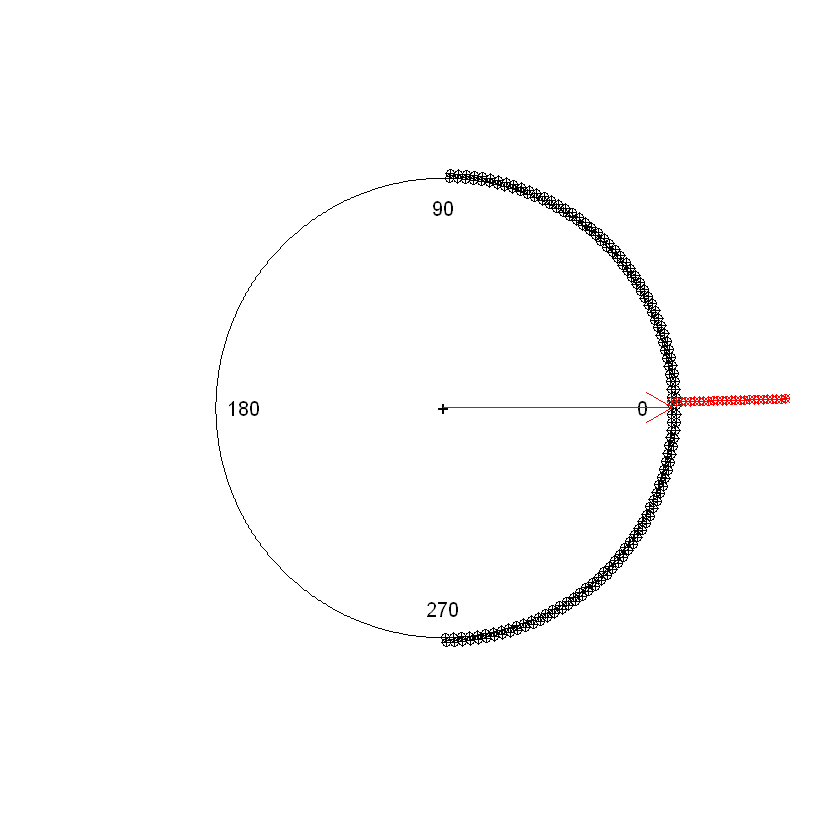

In [22]:
#sample plot from circular tool functions
plot.circular(Twenty_mw, stack= TRUE, pch = 10, sep = 0.02, shrink = 1.2)
Twenty_mw.mean <- mean(Twenty_mw)
arrows.circular(Twenty_mw.mean, col="red")